In [12]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import *

In [7]:
query = {
  "query": {
    "match": {
      "title": "삼성"
    }
  }, 
  "size": 0,
  "aggs": {
    "group_by_date": {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}

In [8]:
query = json.dumps(query)

In [9]:
headers = {
    'Content-Type': 'application/json'
}

In [15]:
resp = requests.get(
    f'{ELASTCSEARCH_URL}/news/_search',
    headers = headers,
    data = query,
    auth = ELASTCSEARCH_AUTH,
)

In [16]:
resp.status_code

200

In [17]:
assert resp.status_code ==200

In [19]:
results = resp.json()

In [20]:
buckets = results['aggregations']['group_by_date']['buckets']

In [22]:
df = pd.DataFrame(buckets)

In [23]:
df.head()

,key_as_string,key,doc_count
0,2022-08-01T00:00:00.000Z,1659312000000,27
1,2022-08-02T00:00:00.000Z,1659398400000,13
2,2022-08-03T00:00:00.000Z,1659484800000,57
3,2022-08-04T00:00:00.000Z,1659571200000,49
4,2022-08-05T00:00:00.000Z,1659657600000,10


In [24]:

df['date'] = pd.to_datetime(df['key_as_string'])

In [25]:
df = df.set_index('date')

In [26]:
plt.rcParams['figure.figsize'] = (10, 4)

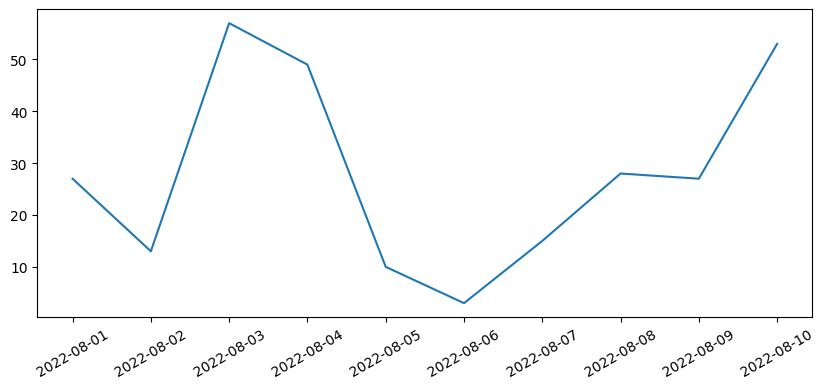

In [27]:
plt.plot(df['doc_count'])
plt.xticks(rotation=30)
plt.show()